In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
"""
#create empty dataframe
endDF = pd.DataFrame()

#number of CSVs we want to go through
#numCSV = 10
numCSV = 2

#go through all CSV and get the duration of songs
for i in range(0, numCSV):
    song_df = pd.read_csv("../Songs/songs{}.csv".format(i))
    duration = list(song_df["duration_ms"])
    #print("working on", i,"th CSV now...")
    endDF = endDF.append(duration, ignore_index=True)

#save it as CSV
#endDF.to_csv("./duration_result.csv")

#preview what it looks like at the end
#endDF

#plt.hist(endDF)
"""

'\n#create empty dataframe\nendDF = pd.DataFrame()\n\n#number of CSVs we want to go through\n#numCSV = 10\nnumCSV = 2\n\n#go through all CSV and get the duration of songs\nfor i in range(0, numCSV):\n    song_df = pd.read_csv("../Songs/songs{}.csv".format(i))\n    duration = list(song_df["duration_ms"])\n    #print("working on", i,"th CSV now...")\n    endDF = endDF.append(duration, ignore_index=True)\n\n#save it as CSV\n#endDF.to_csv("./duration_result.csv")\n\n#preview what it looks like at the end\n#endDF\n\n#plt.hist(endDF)\n'

In [94]:
#testing stuff
temp_song_df_0 = pd.read_csv("../Songs/songs0.csv")
temp_song_df_1 = pd.read_csv("../Songs/songs1.csv")
temp_song_df_2 = pd.read_csv("../Songs/songs2.csv")
temp_song_df_3 = pd.read_csv("../Songs/songs3.csv")
temp_song_df_4 = pd.read_csv("../Songs/songs4.csv")
temp_song_df_5 = pd.read_csv("../Songs/songs5.csv")

duration_0 = temp_song_df_0["duration_ms"]
duration_1 = temp_song_df_1["duration_ms"]
duration_2 = temp_song_df_2["duration_ms"]
duration_3 = temp_song_df_3["duration_ms"]
duration_4 = temp_song_df_4["duration_ms"]
duration_5 = temp_song_df_5["duration_ms"]

collected_df = pd.DataFrame()

collected_df = collected_df.append(duration_0, ignore_index = True)
collected_df = collected_df.append(duration_1, ignore_index = True)
collected_df = collected_df.append(duration_2, ignore_index = True)
collected_df = collected_df.append(duration_3, ignore_index = True)
collected_df = collected_df.append(duration_4, ignore_index = True)
collected_df = collected_df.append(duration_5, ignore_index = True)

collected_df = collected_df.T
collected_df = collected_df.rename(columns = {collected_df.columns[0] : "sample_1"})
collected_df = collected_df.rename(columns = {collected_df.columns[1] : "sample_2"})
collected_df = collected_df.rename(columns = {collected_df.columns[2] : "sample_3"})
collected_df = collected_df.rename(columns = {collected_df.columns[3] : "sample_4"})
collected_df = collected_df.rename(columns = {collected_df.columns[4] : "sample_5"})
collected_df = collected_df.rename(columns = {collected_df.columns[5] : "sample_6"})

print(collected_df.head())
print(collected_df.tail())

   sample_1  sample_2  sample_3  sample_4  sample_5  sample_6
0  226863.0  154506.0  174866.0  209882.0  186176.0  157040.0
1  198800.0   79066.0  327920.0  219106.0  431226.0  191773.0
2  235933.0   94600.0  293826.0  194000.0  152493.0  210080.0
3  267266.0  151480.0  181533.0  237066.0  564133.0  151200.0
4  227600.0  297920.0  231800.0  185807.0  182893.0  159506.0
       sample_1  sample_2  sample_3  sample_4  sample_5  sample_6
68096       NaN       NaN       NaN       NaN  225440.0       NaN
68097       NaN       NaN       NaN       NaN  314186.0       NaN
68098       NaN       NaN       NaN       NaN  226925.0       NaN
68099       NaN       NaN       NaN       NaN  237426.0       NaN
68100       NaN       NaN       NaN       NaN  336720.0       NaN


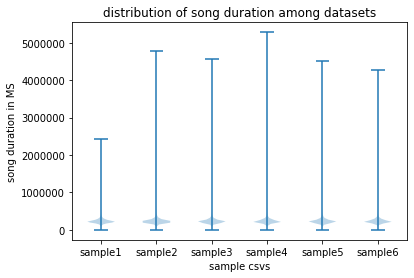

In [95]:
#visualzation
x1 = collected_df["sample_1"]
x2 = collected_df["sample_2"]
x3 = collected_df["sample_3"]
x4 = collected_df["sample_4"]
x5 = collected_df["sample_5"]
x6 = collected_df["sample_6"]

x1 = x1.dropna()
x2 = x2.dropna()
x3 = x3.dropna()
x4 = x4.dropna()
x5 = x5.dropna()
x6 = x6.dropna()


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.violinplot([x1, x2, x3, x4, x5, x6])
ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.set_xticklabels(['sample1', 'sample2', 'sample3', 'sample4', 'sample5', 'sample6'])
ax.set_xlabel('sample csvs')
ax.set_ylabel('song duration in MS')
ax.set_title("distribution of song duration among datasets")
plt.show()

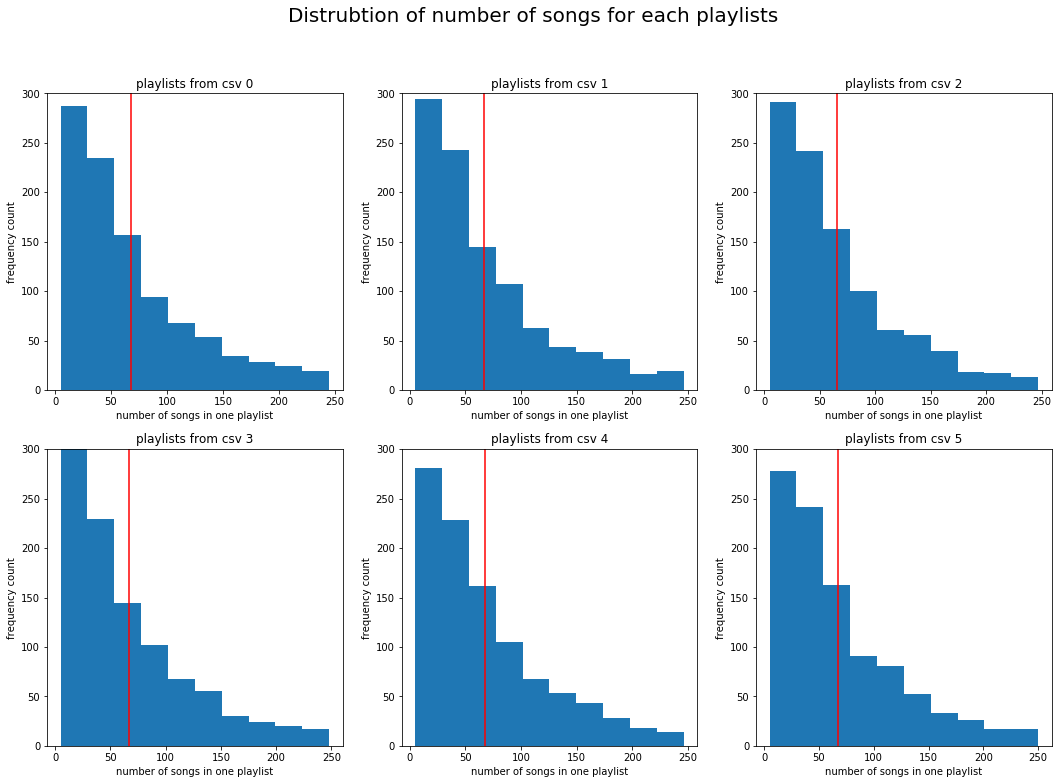

In [169]:
#another EDA...counting the numbers of songs in each dataset
#pid_df_0 = temp_song_df_0["pid"]
pid_df_0 = temp_song_df_0[['pid','pos']]
pid_df_1 = temp_song_df_1[['pid','pos']]
pid_df_2 = temp_song_df_2[['pid','pos']]
pid_df_3 = temp_song_df_3[['pid','pos']]
pid_df_4 = temp_song_df_4[['pid','pos']]
pid_df_5 = temp_song_df_5[['pid','pos']]

dist_0 = pid_df_0.groupby("pid").count()
dist_1 = pid_df_1.groupby("pid").count()
dist_2 = pid_df_2.groupby("pid").count()
dist_3 = pid_df_3.groupby("pid").count()
dist_4 = pid_df_4.groupby("pid").count()
dist_5 = pid_df_5.groupby("pid").count()

f, ax = plt.subplots(2,3, figsize=(18,12))
f.suptitle('Distrubtion of number of songs for each playlists', fontsize=20)
ax = ax.ravel()

ax[0].hist(dist_0['pos'])
ax[0].vlines(dist_0.mean(), colors = 'r', ymin = 0, ymax = 300)
ax[0].set_ylim(0, 300)
ax[0].set_xlabel("number of songs in one playlist")
ax[0].set_ylabel("frequency count")
ax[0].set_title("playlists from csv 0")

ax[1].hist(dist_1['pos'])
ax[1].vlines(dist_1.mean(), colors = 'r', ymin = 0, ymax = 300)
ax[1].set_ylim(0, 300)
ax[1].set_xlabel("number of songs in one playlist")
ax[1].set_ylabel("frequency count")
ax[1].set_title("playlists from csv 1")

ax[2].hist(dist_2['pos'])
ax[2].vlines(dist_2.mean(), colors = 'r', ymin = 0, ymax = 300)
ax[2].set_ylim(0, 300)
ax[2].set_xlabel("number of songs in one playlist")
ax[2].set_ylabel("frequency count")
ax[2].set_title("playlists from csv 2")

ax[3].hist(dist_3['pos'])
ax[3].vlines(dist_3.mean(), colors = 'r', ymin = 0, ymax = 300)
ax[3].set_ylim(0, 300)
ax[3].set_xlabel("number of songs in one playlist")
ax[3].set_ylabel("frequency count")
ax[3].set_title("playlists from csv 3")

ax[4].hist(dist_4['pos'])
ax[4].vlines(dist_4.mean(), colors = 'r', ymin = 0, ymax = 300)
ax[4].set_ylim(0, 300)
ax[4].set_xlabel("number of songs in one playlist")
ax[4].set_ylabel("frequency count")
ax[4].set_title("playlists from csv 4")

ax[5].hist(dist_5['pos']);
ax[5].vlines(dist_5.mean(), colors = 'r', ymin = 0, ymax = 300)
ax[5].set_ylim(0, 300)
ax[5].set_xlabel("number of songs in one playlist")
ax[5].set_ylabel("frequency count")
ax[5].set_title("playlists from csv 5");